# Overfitting Demo
## Purpose
Illustrate the issues of overfitting a model and how this can affect our training and test accuracy.

## References
Note that details from this lesson come from the following source. Recommended reading if you want to learn more!

http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html


# Comments from Lee
The notebook is super clear. I think we should have no problem going through this. One thing that might be nice though is if we could supply a starter notebook that contains the following:
- Initializing the libraries
- Initializing the data and true functions
- Initializing X_test

Also a note about this line of code:

    pipeline.fit(X[:, np.newaxis],y)

I have been using 

    X.reshape(30,1)

I both methods work fine but I think we should try to be consistent in the lesson. I am fine with using either. 

We may also want to show the training scores, cross validation scores, and test scores after each regression to show why test data is so important. 

In [16]:
# Initialize all our libraries

%matplotlib inline
import matplotlib # I dont think this import is necessary
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# from sklearn.model_selection import cross_val_score
# If you have issues with sklearn.model_selection, use the line below
from sklearn.cross_validation import cross_val_score

In [31]:
# Import some random, but deterministic data

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

# Let's check the size of our data
print X.shape
print y.shape

# We notice that X and y don't appear like regular arrays. Python seems OK with this in general, 
# but we start to hit issues when we want to treat these objects like regular arrays

X = np.reshape(X,(30,1))

y = np.reshape(y,(30,1))

# Check our shapes again
print X.shape,  y.shape

# Excellent!

(30L,)
(30L,)
(30L, 1L) (30L, 1L)


In [32]:
# Let's fit a straight line through our data with regression model.

# Set the degree of the polynomial
polydegree = 1

# Create the features
polynomial_features = PolynomialFeatures(degree=polydegree, include_bias = False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features",polynomial_features),("linear_regression",linear_regression)])
pipeline.fit(X,y)

Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=1, include_bias=False, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

(0, 1)

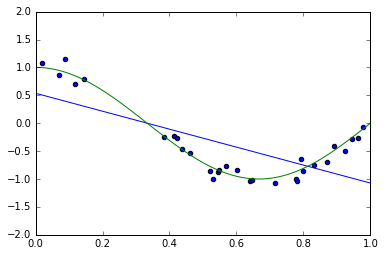

In [33]:
# Now we test our data and plot

plt.figure()

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, label="Samples")
plt.ylim((-2,2))
plt.xlim((0,1))

In [34]:
# We see that our line fits the general trend but the overal fit is quite bad. Let's do this again with second order.

In [38]:
# Let's fit a degree 2 polynomial through our data with regression model.
polydegree = 2

polynomial_features = PolynomialFeatures(degree=polydegree, include_bias = False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features",polynomial_features),("linear_regression",linear_regression)])
pipeline.fit(X,y)

Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

(0, 1)

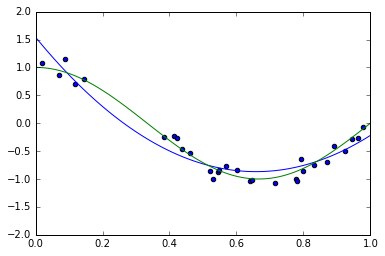

In [39]:
# Now we test our data and plot

plt.figure()

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, label="Samples")
plt.ylim((-2,2))
plt.xlim((0,1))

In [40]:
# We see our data fit gets a lot better. Most of us can see this is a degree 3 polynomial so let's fit that

(0, 1)

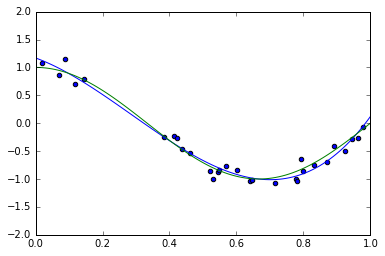

In [41]:
polydegree = 3

polynomial_features = PolynomialFeatures(degree=polydegree, include_bias = False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features",polynomial_features),("linear_regression",linear_regression)])
pipeline.fit(X,y)

# Now we test our data and plot

plt.figure()

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, label="Samples")
plt.ylim((-2,2))
plt.xlim((0,1))

In [42]:
# This looks much better. Why not keep adding degrees?

(0, 1)

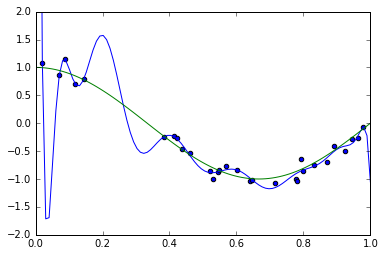

In [43]:
polydegree = 15

polynomial_features = PolynomialFeatures(degree=polydegree, include_bias = False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features",polynomial_features),("linear_regression",linear_regression)])
pipeline.fit(X,y)

# Now we test our data and plot

plt.figure()

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, label="Samples")
plt.ylim((-2,2))
plt.xlim((0,1))

In [13]:
# Something is clearly wrong here. We are no longer fitter the true data. 
# We are now overfitting because we fail to represent the true trend